# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Week8/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

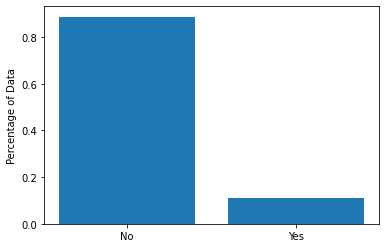

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from imblearn.over_sampling import SMOTE
resample = SMOTE()
X_smote, y_smote = resample.fit_resample(X_scaled,y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.204\ngini = 0.5\nsamples = 51166\nvalue = [25583, 25583]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.47\ngini = 0.279\nsamples = 18930\nvalue = [15758, 3172]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.322\ngini = 0.117\nsamples = 11233\nvalue = [10533, 700]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.099\nsamples = 11020\nvalue = [10446, 574]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.483\nsamples = 213\nvalue = [87, 126]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.307\ngini = 0.436\nsamples = 7697\nvalue = [5225, 2472]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.489\nsamples = 5601\nvalue = [3216, 2385]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.08\nsamples = 2096\nvalue = [2009, 87]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.317\ngini = 0.424\nsamples = 32236\nvalue = [9825, 22411]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.684\ngini = 0.346\nsamples = 26267\nvalue = [5845, 20422]\nclass 

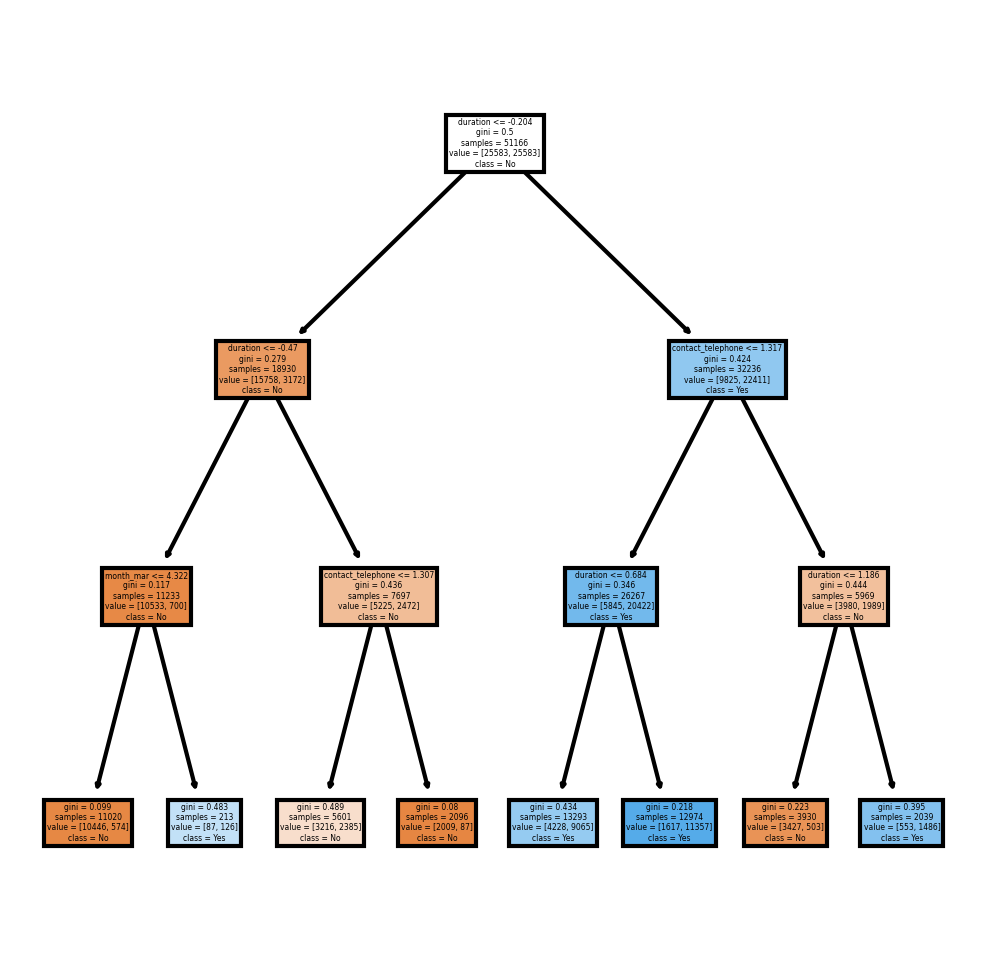

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [14]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7471069029699765


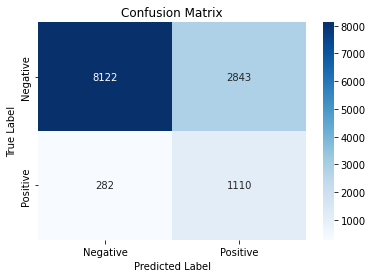

In [15]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [16]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_smote, y_smote.values.ravel())

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=0.5, n_estimators=100)

In [17]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7454883871489844


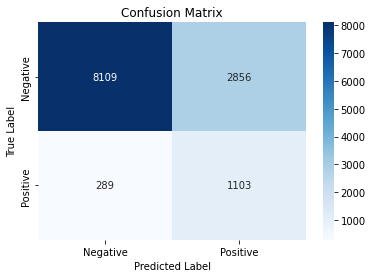

In [18]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_smote, y_smote)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1)

In [21]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.887836853605244


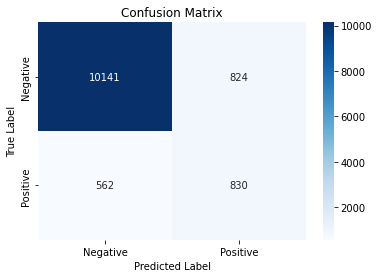

In [22]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [25]:
# pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 5.2 MB/s eta 0:00:00


In [26]:
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
####IMPORT MORE BASE LEARNERS####
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [27]:
, super_learner
### SET YOUR BASE LEARNERS
base_estimator = [
    LogisticRegression(),
    Lasso(),
    RandomForestClassifier(n_estimators = 10),
    MLPRegressor(hidden_layer_sizes = (10, 5))
    #DecisionTreeClassifier(),
    #SVC(kernel='rbf'),
    #KNeighborsClassifier(n_neighbors=5),
    #GaussianNB(),
    #GradientBoostingClassifier()
]

super_learner = SuperLearner(folds=10, random_state=42)
super_learner.add(base_estimator)

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...rer=None)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [29]:
### FIT TO TRAINING DATA
super_learner.fit(X_smote, y_smote.values.ravel())

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...rer=None)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [30]:
### GET base_predictions
base_predictions = super_learner.predict(X_smote)

In [31]:
super_learner

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...rer=None)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [32]:
### TRAIN YOUR METALEARNER

In [33]:
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions, y_smote.values.ravel())

In [34]:
predictions = super_learner.predict(X_test)

In [35]:
y_pred = log_reg.predict(predictions)

In [36]:
### INTERPRET COEFFICIENTS

In [37]:
log_reg.coef_

array([[-11.51822542,  -0.66312693,   2.54708906,  10.69054966]])

In [39]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
cm_super = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8870275956947479


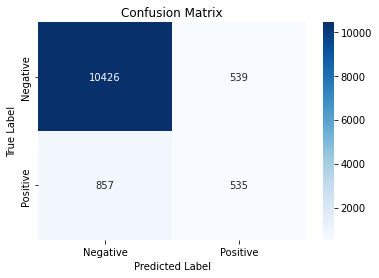

In [40]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_super, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [67]:
x1=[0.7471, 0.7455, 0.8879, 0.8870]
sensitivity = [0]*4
sensitivity[0]=round(cm_raw[0][0]/(cm_raw[0][0]+cm_raw[0][1]),4)
sensitivity[1]=round(cm_bag[0][0]/(cm_bag[0][0]+cm_bag[0][1]),4)
sensitivity[2]=round(cm_boost[0][0]/(cm_boost[0][0]+cm_boost[0][1]),4)
sensitivity[3]=round(cm_super[0][0]/(cm_super[0][0]+cm_super[0][1]),4)

specificity = [0]*4
specificity[0]=round(cm_raw[1][1]/(cm_raw[1][1]+cm_raw[1][0]),4)
specificity[1]=round(cm_bag[1][1]/(cm_bag[1][1]+cm_bag[1][0]),4)
specificity[2]=round(cm_boost[1][1]/(cm_boost[1][1]+cm_boost[1][0]),4)
specificity[3]=round(cm_super[1][1]/(cm_super[1][1]+cm_super[1][0]),4)

models=['decision tree','bagging','boosting','superlearner']

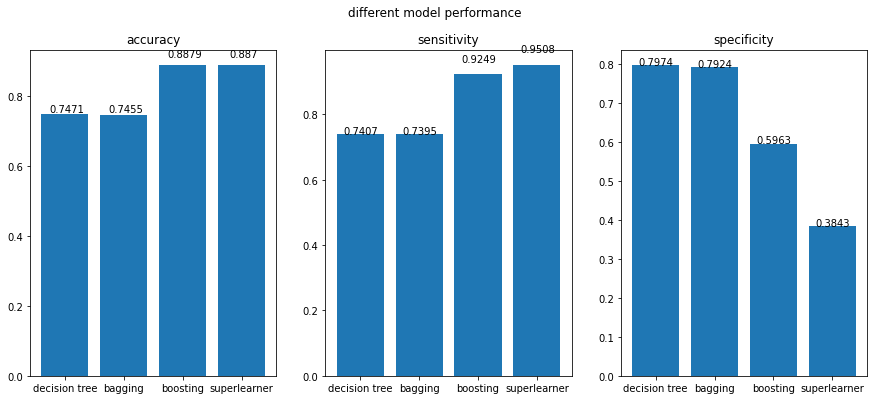

In [72]:
fig, ax = plt.subplots(1,3,figsize=(15,6))

ax[0].bar(models,x1)
ax[0].set_title('accuracy')
for x,y in enumerate(x1):
  plt.text(x-10,y-0.07,y,ha='center')

ax[1].bar(models,sensitivity)
ax[1].set_title('sensitivity')
for x,y in enumerate(sensitivity):
  plt.text(x-5,y-0.12,y,ha='center')


ax[2].bar(models,specificity)
ax[2].set_title('specificity')
for x,y in enumerate(specificity):
  plt.text(x,y,y,ha='center')

plt.suptitle('different model performance')
plt.show()

In [74]:
from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_pred, pos_label=1)
sensitivity

0.3843390804597701